# <center>Laboratorium 9<br>Metody Numeryczne</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.

***Materiały przygotowujące:***


In [1]:
import main
import numpy as np
import scipy.optimize
import matplotlib
import matplotlib.pyplot as plt
import math

***Temat główny:***

Znajdź miejsca zerowe funkcji: 
$$ 
f(x) = e^{-2x} + x^2 - 1 
$$,

metodami:
* Bisekcji,
* Siecznych,
* Newtona

Funkcja i jej pochodne zostały zaimplementowane w *main.py*

***Zadanie 1.***  
Wykonaj wykres funckji oraz jej pierwszej i drugiej pochodnej (obliczonej analitycznie) na jednym rysunku w przedziale pozwalającym na zgrubne określenie miejsc zerowych. Wykres powinien być odpowiednio opisany. Określ przedział miejsca zerowego.

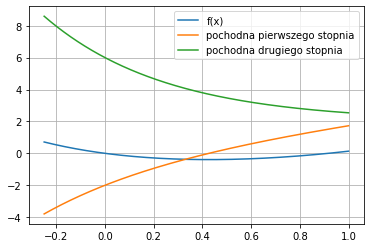

In [2]:
x = np.linspace(-0.25, 1, 1000)

plt.plot(x, main.fun(x), label='f(x)')
plt.plot(x, main.dfun(x), label='pochodna pierwszego stopnia')
plt.plot(x, main.ddfun(x), label='pochodna drugiego stopnia')
plt.grid()
plt.legend()
plt.show()

Dwa miejsca zerowe w przedziale <0; 1>

***Zadanie 2.***  
Zaimplementuj [metodę bisekcji](https://en.wikipedia.org/wiki/Bisection_method)

Gwarancja zbieżności:

1) funkcja jest ciągła na danym przedziale [a,b]

2) funkcja na końcach przedziału przyjmuje przeciwne znaki

***Zadanie 3.***  
Zaimplementuj [metodę siecznych](https://en.wikipedia.org/wiki/Secant_method)

Gwarancja zbieżności:

1) funkcja jest ciągła na danym przedziale [a,b]

2) Pierwsza i druga pochodna istnieją i są ciągłe w przedziale domkniętym [a,b]

3) funkcja na końcach przedziału przyjmuje przeciwne znaki

4) pierwsza i druga pochodna mają stały znak (brak eksremów lokalnych i punktów przegięcia)


***Zadanie 4.***  
Zaimplementuj [metodę Newtona](https://en.wikipedia.org/wiki/Newton%27s_method)

Gwarancja zbieżności:

1) funkcja jest ciągła na danym przedziale [a,b]

2) Pierwsza i druga pochodna istnieją i są ciągłe w przedziale domkniętym [a,b]

3) funkcja na końcach przedziału przyjmuje przeciwne znaki

4) pierwsza i druga pochodna mają stały znak (brak eksremów lokalnych i punktów przegięcia)


***Zadania 5.***  
Dla głównej funkcji z zadania 1 znajdź miejsca zerowe przy użyciu:

* funkcji root dostępnej w pakiecie scipy.optimize
* funkcji fsolve dostępnej w pakiecie scipy.optimize


In [3]:
print('x1 = ', scipy.optimize.root(main.fun, 0)['x'][0])
print('x2 = ', scipy.optimize.root(main.fun, 0.9)['x'][0], '\n')

print('x1 = ', scipy.optimize.fsolve(main.fun, 0)[0])
print('x2 = ', scipy.optimize.fsolve(main.fun, 0.9)[0])



x1 =  0.0
x2 =  0.9165625831057005 

x1 =  0.0
x2 =  0.9165625831057005


***Zadanie 6.***  
Dla głównej funkcji oraz przedziału zdefiniowanego z zadania 1 znajdź miejsca zerowe przy użyciu:

* metody bisekcji
* metody siecznych
* metody Newtona

z tolerancją $10^{-10}$

Zbadaj dokładność(względem rozwiązania z zadania 5) i czas obliczeń metod w zależności od liczby iteracji. Wyniki przedstaw na wykresach. 

16.5 µs ± 1.05 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
31.9 µs ± 9.85 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
19.1 µs ± 572 ns per loop (mean ± std. dev. of 10 runs, 100 loops each)
27.3 µs ± 10.6 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
41.8 µs ± 1.02 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
22.2 µs ± 844 ns per loop (mean ± std. dev. of 10 runs, 100 loops each)
24.8 µs ± 1.41 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
54.4 µs ± 1.99 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
34.1 µs ± 12 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
62.7 µs ± 19.3 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
78.8 µs ± 6.82 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
33.4 µs ± 3.69 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
37.3 µs ± 1.25 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
83.7 µs ± 2.49 µs per loop (mean ± std. dev. of 10 runs

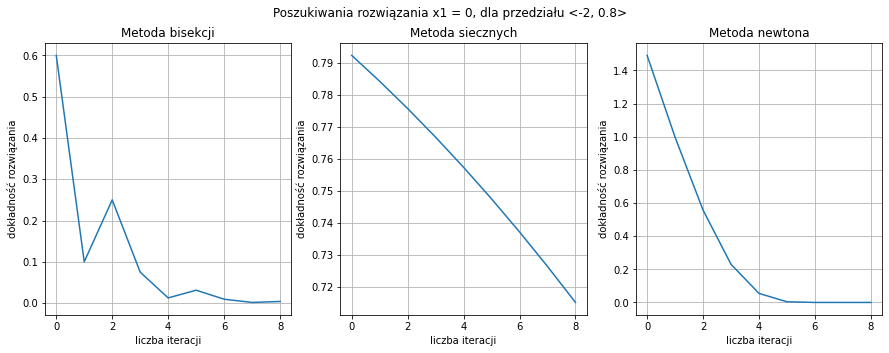

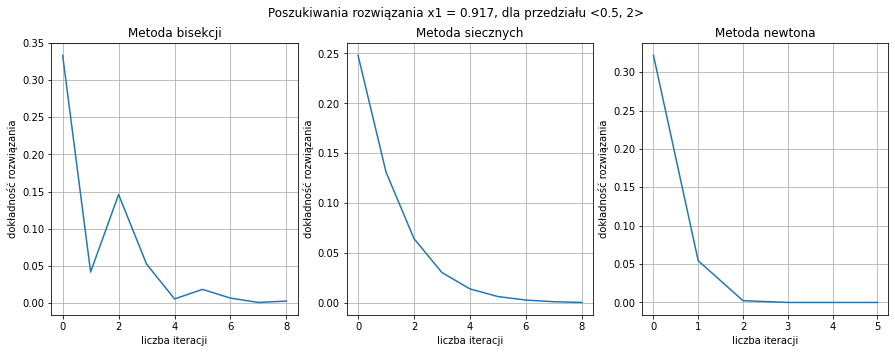

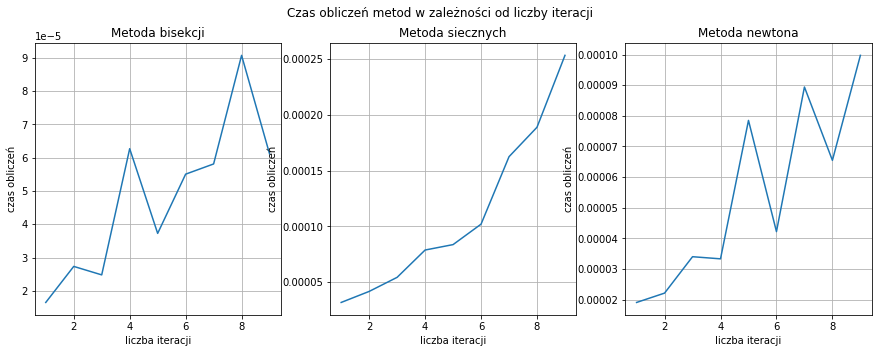

In [4]:
x1 = scipy.optimize.root(main.fun, 0)['x'][0]
x2 = scipy.optimize.root(main.fun, 0.9)['x'][0]

a = -2
b = 0.8
epsilon = 1e-10

bisec1 = []
bisec2 = []
secant1 = []
secant2 = []
newton1 = []
newton2 = []
time1 = []
time2 = []
time3 = []

it_ = [i for i in range(1, 10)]
for it in it_:
    bisec1.append(abs(main.bisection(a, b, main.fun, epsilon, it)[0] - x1))
    bisec2.append(main.bisection(a, b, main.fun, epsilon, it)[1])
    secant1.append(abs(main.secant(a, b, main.fun, epsilon, it)[0] - x1))
    secant2.append(main.secant(a, b, main.fun, epsilon, it)[1])
    newton1.append(abs(main.newton(main.fun, main.dfun, main.ddfun, a, b, epsilon, it)[0] - x1))
    newton2.append(main.newton(main.fun, main.dfun, main.ddfun, a, b, epsilon, it)[1])
    avg_time = %timeit -r 10 -n 100 -o main.bisection(a, b, main.fun, epsilon, it)
    time1.append(avg_time.average)
    avg_time = %timeit -r 10 -n 100 -o main.secant(a, b, main.fun, epsilon, it)
    time2.append(avg_time.average)
    avg_time = %timeit -r 10 -n 100 -o main.newton(main.fun, main.dfun, main.ddfun, a, b, epsilon, it)
    time3.append(avg_time.average)




fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Poszukiwania rozwiązania x1 = 0, dla przedziału <-2, 0.8>')
ax1.plot(bisec2, bisec1)
ax1.set_title('Metoda bisekcji')
ax1.set_xlabel('liczba iteracji')
ax1.set_ylabel('dokładność rozwiązania')
ax1.grid()
ax2.plot(secant2, secant1)
ax2.set_title('Metoda siecznych')
ax2.set_xlabel('liczba iteracji')
ax2.set_ylabel('dokładność rozwiązania')
ax2.grid()
ax3.plot(newton2, newton1)
ax3.set_title('Metoda newtona')
ax3.set_xlabel('liczba iteracji')
ax3.set_ylabel('dokładność rozwiązania')
ax3.grid()
plt.show()


a = 0.5
b = 2
epsilon = 1e-10

bisec1 = []
bisec2 = []
secant1 = []
secant2 = []
newton1 = []
newton2 = []

it_ = [i for i in range(1, 10)]
for it in it_:
    bisec1.append(abs(main.bisection(a, b, main.fun, epsilon, it)[0] - x2))
    bisec2.append(main.bisection(a, b, main.fun, epsilon, it)[1])
    secant1.append(abs(main.secant(a, b, main.fun, epsilon, it)[0] - x2))
    secant2.append(main.secant(a, b, main.fun, epsilon, it)[1])
    newton1.append(abs(main.newton(main.fun, main.dfun, main.ddfun, a, b, epsilon, it)[0] - x2))
    newton2.append(main.newton(main.fun, main.dfun, main.ddfun, a, b, epsilon, it)[1])



fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Poszukiwania rozwiązania x1 = 0.917, dla przedziału <0.5, 2>')
ax1.plot(bisec2, bisec1)
ax1.set_title('Metoda bisekcji')
ax1.set_xlabel('liczba iteracji')
ax1.set_ylabel('dokładność rozwiązania')
ax1.grid()
ax2.plot(secant2, secant1)
ax2.set_title('Metoda siecznych')
ax2.set_xlabel('liczba iteracji')
ax2.set_ylabel('dokładność rozwiązania')
ax2.grid()
ax3.plot(newton2, newton1)
ax3.set_title('Metoda newtona')
ax3.set_xlabel('liczba iteracji')
ax3.set_ylabel('dokładność rozwiązania')
ax3.grid()
plt.show()


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Czas obliczeń metod w zależności od liczby iteracji')
ax1.plot(it_, time1)
ax1.set_title('Metoda bisekcji')
ax1.set_xlabel('liczba iteracji')
ax1.set_ylabel('czas obliczeń')
ax1.grid()
ax2.plot(it_, time2)
ax2.set_title('Metoda siecznych')
ax2.set_xlabel('liczba iteracji')
ax2.set_ylabel('czas obliczeń')
ax2.grid()
ax3.plot(it_, time3)
ax3.set_title('Metoda newtona')
ax3.set_xlabel('liczba iteracji')
ax3.set_ylabel('czas obliczeń')
ax3.grid()
plt.show()


Zapoznałem się z trzema metodami rozwiązywania równań nieliniowych. Zaimplementowałem ich logikę oraz zbadałem dokładność i czas obliczeń w zależności od liczby iteracji.

##
! Jeden test z metody siecznych i jeden test z metody newtona nie przeszedł. !